In [44]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import time
from sklearn.model_selection import GridSearchCV

In [2]:
data1 = pd.read_csv('project3_dataset1.txt', sep = '\t', header = None)
data2 = pd.read_csv('project3_dataset2.txt', sep = '\t', header = None)

In [3]:
data1_X = data1.iloc[:,:30]
data1_y = data1.iloc[:,30]

data2_X = data2.iloc[:,:9]
data2_y = data2.iloc[:,9]

# Task:
# 1. Implement the given method
# 2. Adopt 10-fold Cross Validation to evaluate the performance of all methods on the provided two datasets in terms of Accuracy, Precision, Recall, F-1 measure, and AUC (area under the curve).
# 3. Conduct analysis on Bias-variance tradeoff and overfitting vs. underfitting for all methods
# 4. Discuss which algorithm works best in each scenario/validation.

## For logistic regression, the only choice is whether to apply a regularization and if so, scale the labmda value
### So implement a 10 fold cv and test which is the best labmda value to use for regularization

### dataset 1

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data1_X, data1_y, test_size=0.2, random_state=42)

In [28]:
# call the method and then compute the mean and std
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
print(scaler.mean_)
# https://scikit-learn.org/stable/modules/preprocessing.html


[1.41107516e+01 1.93148352e+01 9.18348791e+01 6.53812967e+02
 9.62530769e-02 1.03363956e-01 8.86329516e-02 4.86383319e-02
 1.81124396e-01 6.27304396e-02 4.02307912e-01 1.21019846e+00
 2.82773253e+00 3.99914176e+01 7.02563956e-03 2.52447297e-02
 3.19192330e-02 1.16744374e-02 2.04022154e-02 3.74322703e-03
 1.62612352e+01 2.56728352e+01 1.07198242e+02 8.82366593e+02
 1.32161385e-01 2.52096198e-01 2.72137976e-01 1.14082218e-01
 2.89362418e-01 8.35342198e-02]


In [38]:
# this scales the data to have a mean of zero and a std of 1 for each feature
X_scaled = scaler.transform(X_train)
print('Mean: ', sum(X_scaled)/len(X_scaled))
print('Standard Deviation: ', np.std(X_scaled))

Mean:  [-5.38946177e-17 -3.67227616e-16 -5.48325122e-17 -1.50246116e-16
 -1.29005475e-15 -1.83125798e-16  1.27035135e-16 -1.22368538e-16
  8.30837231e-16  7.78315141e-16  1.27675648e-16 -5.12410627e-18
 -3.34286933e-17 -2.13504428e-17  3.26356768e-16 -1.49453099e-17
  3.14004012e-17 -2.15090461e-16 -1.83468930e-16  1.03092138e-16
  2.96084890e-16  2.42297025e-16 -1.41400932e-16 -2.27107710e-16
 -4.41161149e-16  1.54089196e-16  3.19890634e-16 -7.46655485e-17
  6.78700075e-16 -2.06184276e-16]
Standard Deviation:  1.0


In [106]:
# define the model
logReg = LogisticRegression(random_state=42, penalty = 'l2', max_iter=250)
C_values = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]
params = [{'C' : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]}]

# I can either apply no regularization or an l2 regularization
# none gives training error of 0, test error of 2.9%, l2 gives training error of 1.3%, test error of 1.8%

In [107]:
t = time.time()

gs_logReg = GridSearchCV(estimator = logReg,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10,
                     verbose = 1)
gs_logReg.fit(X_scaled, y_train)

elapsed = time.time() - t
print('The Best parameters are: ', gs_logReg.best_params_)
print('The optimal parameters were found in :', elapsed, ' seconds')


Fitting 10 folds for each of 10 candidates, totalling 100 fits
The Best parameters are:  {'C': 0.5}
The optimal parameters were found in : 1.1603639125823975  seconds


Text(33.0, 0.5, 'Regularization strength C')

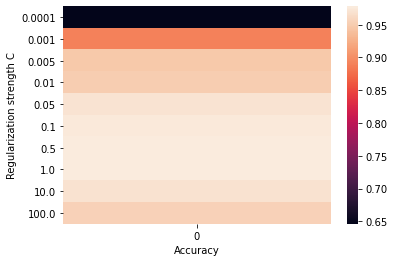

In [108]:
results = pd.DataFrame(gs_logReg.cv_results_['mean_test_score'])
results['label'] = C_values
results = results.set_index('label')
sns.heatmap(results)
plt.xlabel('Accuracy')
plt.ylabel('Regularization strength C')

/Users/gabrielhanson/anaconda3/envs/metabolism/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Parameterization')]

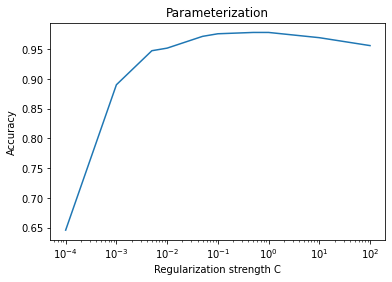

In [114]:
lineplot = sns.lineplot(results.index, results[0])
lineplot.set(xscale='log')
lineplot.set(xlabel = 'Regularization strength C')
lineplot.set(ylabel = 'Accuracy')
lineplot.set(title = 'Parameterization')

In [8]:
# fit the model
logReg.fit(X_scaled, y_train)

LogisticRegression(random_state=42)

In [9]:
# use the model to make predictinos
logReg.predict(X_scaled);

In [10]:
logReg.predict_proba(X_scaled);

In [11]:
logReg.score(X_scaled,y_train)

0.9874371859296482

In [12]:
# test

In [13]:
test_scaled = scaler.transform(X_test)
predictions = logReg.predict(test_scaled)

In [14]:
metrics.confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [15]:
# accuracy A = (TP + TN) / (TP + FN + FP + TN)
accuracy = logReg.score(test_scaled,y_test)
accuracy

0.9824561403508771

In [16]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[107,   1],
       [  2,  61]])

In [17]:
cm[0][1]

1

In [18]:
# precision: p = TP / (TP + FP)
precision = (cm[0][0])/(cm[0][0] + cm[0][1])
precision

0.9907407407407407

In [19]:
# recall: r = TP / ( TP + FN)
recall = (cm[0][0])/(cm[0][0]+cm[1][0])
recall

0.981651376146789

In [20]:
# F1: F = 2*r*r / (r + p)
F1 = 2*precision*recall/(precision+recall)
F1

0.9861751152073732

In [21]:
# AUC: gotta figure this one out
auc = metrics.roc_auc_score(y_test,predictions)
auc

0.9794973544973545

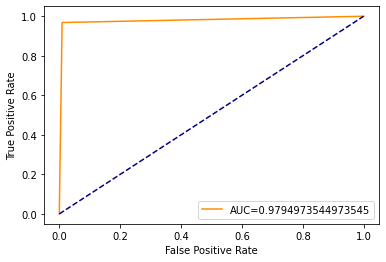

In [22]:
#define metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  predictions)
auc = metrics.roc_auc_score(y_test, predictions)

#create ROC curve
plt.plot(fpr,tpr, label="AUC="+str(auc), color = 'darkorange')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 4)
plt.show()

## dataset2

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data2_X, data2_y, test_size=0.3, random_state=42)